# Задача классификации
<ul>
    <li>Исследуемый датасет: <a>https://www.kaggle.com/kabure/german-credit-data-with-risk</a></li>
    <li>Описание задачи: Необходимо вычислить риск невозврата кредита</li>
</ul>

Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier

Загрузка датасета

In [2]:
dataset = pd.read_csv("datasets/credit/german_credit_data.csv",index_col=0)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
dataset.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Построение графика незаполненных данных

Text(0.5, 1.0, 'Missing value heatmap')

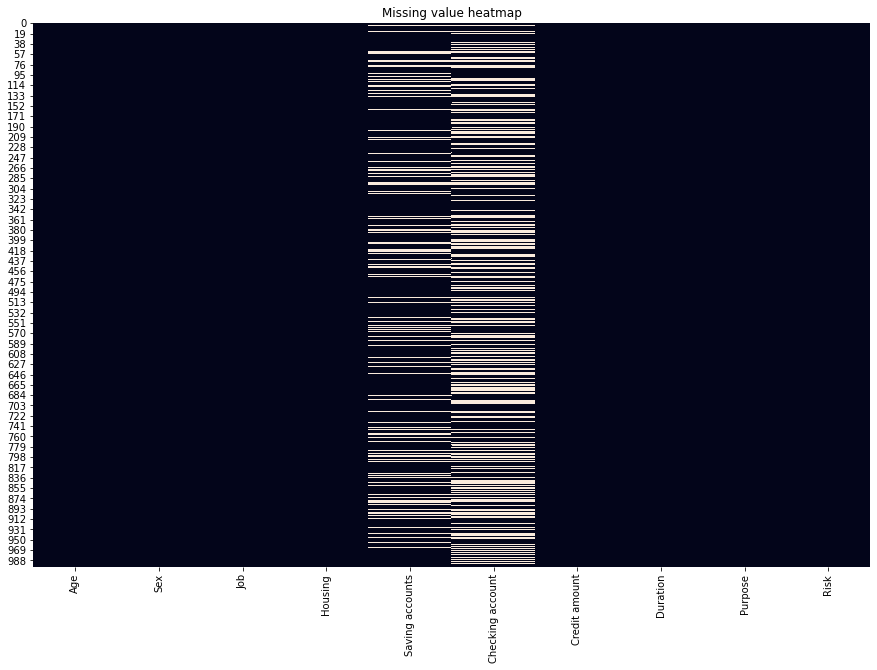

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset.isnull(),cbar = False).set_title("Missing value heatmap")

Удаление незаполненных строк из датасета

In [6]:
dataset.dropna(subset=['Saving accounts','Checking account'], inplace=True)

<b>Преобразование типа object к числовым типам</b>

In [7]:
du = {"Sex":[],"Housing":[],"Saving accounts":[],"Checking account":[],"Purpose":[],"Risk":[]}
for i in du.keys():
    du[i] = dataset[i].unique()
du

{'Sex': array(['female', 'male'], dtype=object),
 'Housing': array(['own', 'free', 'rent'], dtype=object),
 'Saving accounts': array(['little', 'moderate', 'quite rich', 'rich'], dtype=object),
 'Checking account': array(['moderate', 'little', 'rich'], dtype=object),
 'Purpose': array(['radio/TV', 'furniture/equipment', 'car', 'business',
        'domestic appliances', 'repairs', 'vacation/others', 'education'],
       dtype=object),
 'Risk': array(['bad', 'good'], dtype=object)}

In [8]:
du_encoder, du_decoder = du.copy(), du.copy()
for i in du:
    du_encoder[i] = { du[i][j]:j for j in range(0, len(du[i]))}
    du_decoder[i] = { j:du[i][j] for j in range(0, len(du[i]))}

du_encoder, du_decoder

({'Sex': {'female': 0, 'male': 1},
  'Housing': {'own': 0, 'free': 1, 'rent': 2},
  'Saving accounts': {'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3},
  'Checking account': {'moderate': 0, 'little': 1, 'rich': 2},
  'Purpose': {'radio/TV': 0,
   'furniture/equipment': 1,
   'car': 2,
   'business': 3,
   'domestic appliances': 4,
   'repairs': 5,
   'vacation/others': 6,
   'education': 7},
  'Risk': {'bad': 0, 'good': 1}},
 {'Sex': {0: 'female', 1: 'male'},
  'Housing': {0: 'own', 1: 'free', 2: 'rent'},
  'Saving accounts': {0: 'little', 1: 'moderate', 2: 'quite rich', 3: 'rich'},
  'Checking account': {0: 'moderate', 1: 'little', 2: 'rich'},
  'Purpose': {0: 'radio/TV',
   1: 'furniture/equipment',
   2: 'car',
   3: 'business',
   4: 'domestic appliances',
   5: 'repairs',
   6: 'vacation/others',
   7: 'education'},
  'Risk': {0: 'bad', 1: 'good'}})

In [9]:
data = dataset.copy()
for i in du_encoder:
    data[i] = data[i].map(du_encoder[i])
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,0,2,0,0,0,5951,48,0,0
3,45,1,2,1,0,1,7882,42,1,1
4,53,1,2,1,0,1,4870,24,2,0
7,35,1,3,2,0,0,6948,36,2,1
9,28,1,3,0,0,0,5234,30,2,0


In [10]:
data.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,34.888889,0.678161,1.875479,0.538314,0.342912,0.672414,3278.745211,21.339080,1.831418,0.557471
std,11.787918,0.467630,0.682811,0.814614,0.760870,0.651269,2929.155177,12.474079,1.788835,0.497163
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,276.000000,6.000000,0.000000,0.000000
25%,26.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1297.500000,12.000000,0.000000,0.000000
50%,31.500000,1.000000,2.000000,0.000000,0.000000,1.000000,2326.500000,18.000000,2.000000,1.000000
75%,41.000000,1.000000,2.000000,1.000000,0.000000,1.000000,3971.250000,26.750000,2.000000,1.000000
max,75.000000,1.000000,3.000000,2.000000,3.000000,2.000000,18424.000000,72.000000,7.000000,1.000000


Разделение датасета на обучающую и тестовую выборку

In [11]:
y = data['Risk']
x = data.drop(columns = ['Risk'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

df_train = pd.concat([x_train, y_train], axis = 1)
df_test = pd.concat([x_test, y_test], axis = 1)

<b>Визуализация данных</b>

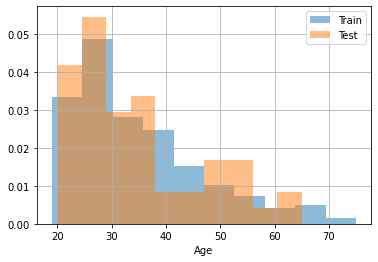

In [12]:
df_train.loc[:, 'Age'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Age'].hist(alpha=0.5, label='Test', density=True)  
plt.xlabel('Age')
plt.legend()

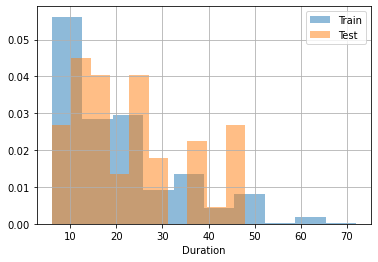

In [13]:
df_train.loc[:, 'Duration'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Duration'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Duration')
plt.legend()

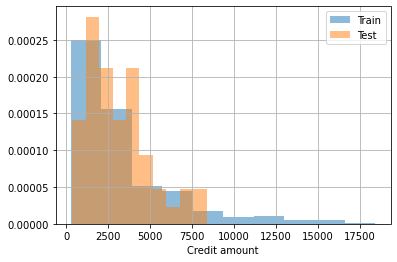

In [14]:
df_train.loc[:, 'Credit amount'].hist(alpha=0.5, label='Train', density=True)    
df_test.loc[:, 'Credit amount'].hist(alpha=0.5, label='Test', density=True)
plt.xlabel('Credit amount')
plt.legend()

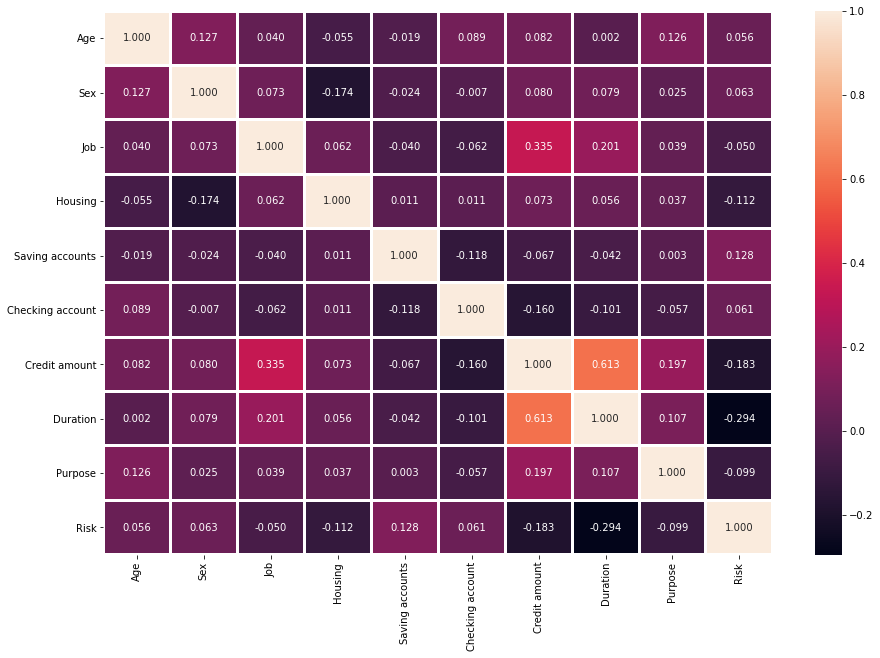

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(),annot=True, fmt='.3f', linewidths=2)

По корреляционной матрице можно прийти к выводу, что больше всего успешность возврата кредита, зависит от длительности кредита и величины самого кредита, причем с обратной зависимостью (увеличение-уменьшение)

<b>Линейная классификация</b>

In [16]:
logit = LogisticRegression(max_iter=10000)
logit.fit(x_train, y_train);

In [17]:
round(logit.score(x_test, y_test), 3)

0.66

<b>Метод ближайших соседей</b>

In [18]:
K = { k : round(KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train).score(x_test, y_test), 3)  for k in range(2, 15)}
[k for k in K.keys() if K[k] == max(K.values())][0], max(K.values())

(3, 0.604)

In [19]:
K

{2: 0.585,
 3: 0.604,
 4: 0.528,
 5: 0.585,
 6: 0.585,
 7: 0.528,
 8: 0.528,
 9: 0.585,
 10: 0.528,
 11: 0.547,
 12: 0.566,
 13: 0.585,
 14: 0.585}

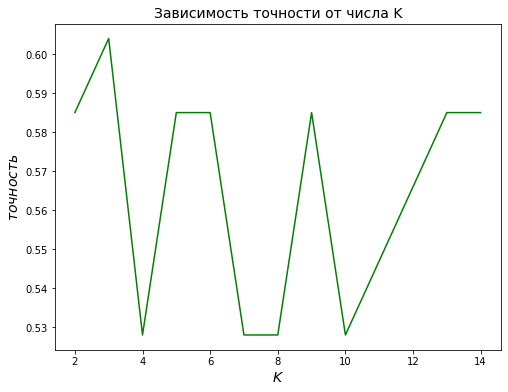

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(list(K.keys()), list(K.values()), 'green')
plt.title(r'Зависимость точности от числа K', size=14)
plt.xlabel(r'$K$', size=14)
plt.ylabel(r'$точность$', size = 14)
plt.show()

<b>Метод опорных элементов</b>

In [21]:
clf = svm.SVC()
clf.fit(x_train, y_train);

round(clf.score(x_test, y_test), 3)

0.509

<b>Метод стохастического градиентного спуска</b>

In [22]:
clf = SGDClassifier()
clf.fit(x_train, y_train);
round(clf.score(x_test, y_test), 3)

0.491